Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Separate features from the target variable
X = data.drop(columns=['Species'])
y = data['Species']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [7]:
for k, w in zip(K, wcss):
    print(f'Number of clusters: {k}, Sum of Squares: {w}')

Number of clusters: 1, Sum of Squares: 749.9999999999999
Number of clusters: 2, Sum of Squares: 273.7275610947794
Number of clusters: 3, Sum of Squares: 177.05608895062977
Number of clusters: 4, Sum of Squares: 158.93367900798822
Number of clusters: 5, Sum of Squares: 128.6383790570075
Number of clusters: 6, Sum of Squares: 103.36421132682497
Number of clusters: 7, Sum of Squares: 95.29726147435927
Number of clusters: 8, Sum of Squares: 83.44284204870999
Number of clusters: 9, Sum of Squares: 75.83087193095857
Number of clusters: 10, Sum of Squares: 69.55715254146907


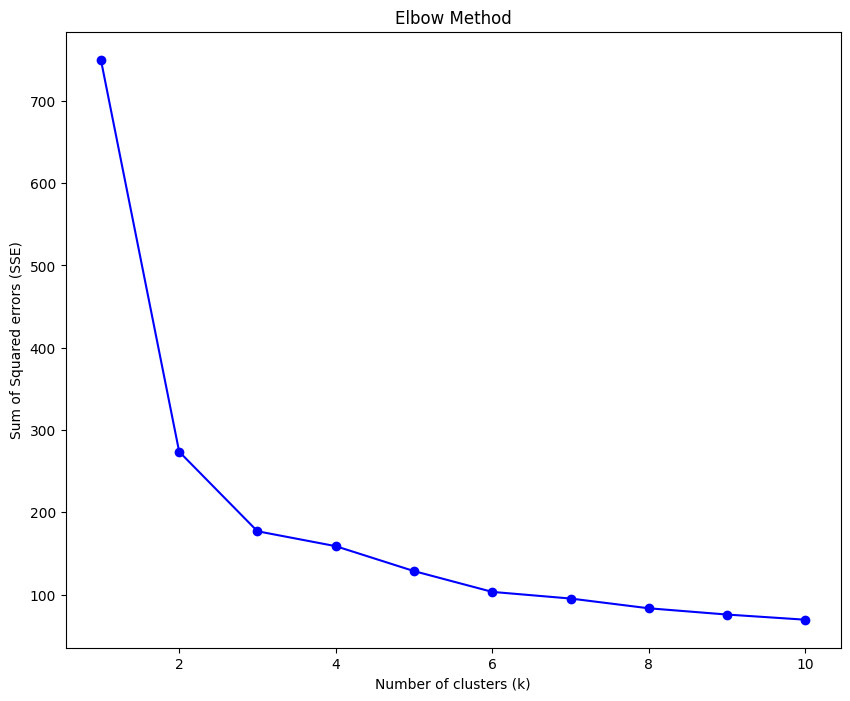

In [8]:
# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [9]:
optimal_k = 2

In [10]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

In [11]:
print("Cluster assignments for each data point:")
print(data[['SepalLengthCm', 'SepalWidthCm', 'Cluster']])

Cluster assignments for each data point:
     SepalLengthCm  SepalWidthCm  Cluster
0              5.1           3.5        0
1              4.9           3.0        0
2              4.7           3.2        0
3              4.6           3.1        0
4              5.0           3.6        0
..             ...           ...      ...
145            6.7           3.0        1
146            6.3           2.5        1
147            6.5           3.0        1
148            6.2           3.4        1
149            5.9           3.0        1

[150 rows x 3 columns]


In [12]:
colors = {0: 'blue', 1: 'green'}
data['Color'] = data['Cluster'].map(colors)

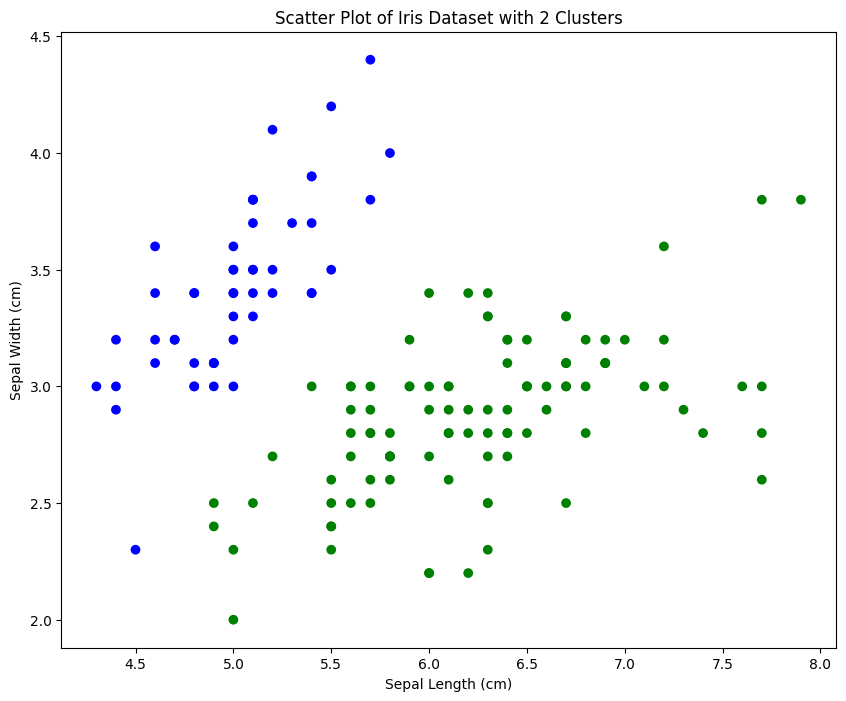

In [13]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], marker='o',c=data['Color'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'Scatter Plot of Iris Dataset with {optimal_k} Clusters')
plt.show()